# Automatise Sample Code

Sample Code in python notebook to use Automatise as a python library.

[download button]

**Observations:**
- Scripting not yet compatible with windows, only linux shell

---

### 1. Paths Configurations
You can use configured paths if you want to organize directories

In [1]:
import sys, os

root      = os.path.join('automatize', 'assets', 'examples', 'Example')

# We consider this folder organization to the experimental enviromnent:
prg_path  = os.path.join(root, 'programs')
data_path = os.path.join(root, 'data')
res_path  = os.path.join(root, 'results')

# OR, you can use the .jar method files in:
prg_path  = os.path.join('automatize', 'assets', 'method')

### 2. Pre-processing data
To use helpers for data pre-processing, import from package `automatise` the module `preprocessing.py`:

In [3]:
from automatize.preprocessing import *

The **preprocessing** module provides some functions to work data:

Basic functions:
- `readDataset`: load datasets as pandas DataFrame (from .csv, .zip, or .ts)
- `printFeaturesJSON`: print a default JSON file descriptor for Movelets methods (version 1 or 2)
- `datasetStatistics`: calculates statistics from a datasets dataframe.

Train and Test split functions:
- `trainAndTestSplit`: split dataset (pandas DataFrame) in train / test (70/30% by default)
- `kfold_trainAndTestSplit`: split dataset (pandas DataFrame) in k-fold train / test (80/20% each fold by default)
- `stratify`: extract trajectories from the dataset, creating a subset of the data (to use when smaller datasets are needed)
- `joinTrainAndTest`: joins the train and test files into one DataFrame.

Type convertion functions:
- `convertDataset`: default format conversions. Reads the dataset files and saves in .csv and .zip formats, also do k-fold split if not present
- `zip2df`: converts .zip files and saves to DataFrame
- `zip2csv`: converts .zip files and saves to .csv files
- `df2zip`: converts DataFrame and saves to .zip files
- `zip2arf`: converts .zip and saves to .arf files
- `any2ts`: converts .zip or .csv files and saves to .ts files
- `xes2csv`: reads .xes files and converts to DataFrame

In [10]:
#cols = ['tid','label','lat','lon','day','hour','poi','category','price','rating']

df = joinTrainAndTest(data_path, train_file="train.csv", test_file="test.csv", class_col = 'label')
df.head()

Joining train and test data from... automatize/assets/examples/Example/data
Done.
 --------------------------------------------------------------------------------


tid  lat_lon  hour  price         poi weather     day         label
0   12  0.0 6.2     8     -1        Home   Clear  Monday  Classs_False
1   12  0.8 6.2     9      2  University  Clouds  Monday  Classs_False
2   12   3.1 11    12      2  Restaurant   Clear  Monday  Classs_False
3   12  0.8 6.5    13      2  University   Clear  Monday  Classs_False
4   12  0.2 6.2    17     -1        Home    Rain  Monday  Classs_False

To k-fold split a dataset into train and test:

In [11]:
k = 3

train, test = kfold_trainAndTestSplit(data_path, k, df, random_num=1, class_col='label')

3-fold train and test split in... automatize/assets/examples/Example/data


Spliting Data:   0%|          | 0/2 [00:00<?, ?it/s]

Done.
Writing files ... 1/3


Writing TRAIN - ZIP|1:   0%|          | 0/7 [00:00<?, ?it/s]

Writing TEST  - ZIP|1:   0%|          | 0/4 [00:00<?, ?it/s]

Writing TRAIN / TEST - CSV|1


Writing TRAIN - MAT|1:   0%|          | 0/7 [00:00<?, ?it/s]

Writing TEST  - MAT|1:   0%|          | 0/4 [00:00<?, ?it/s]

Writing files ... 2/3


Writing TRAIN - ZIP|2:   0%|          | 0/7 [00:00<?, ?it/s]

Writing TEST  - ZIP|2:   0%|          | 0/4 [00:00<?, ?it/s]

Writing TRAIN / TEST - CSV|2


Writing TRAIN - MAT|2:   0%|          | 0/7 [00:00<?, ?it/s]

Writing TEST  - MAT|2:   0%|          | 0/4 [00:00<?, ?it/s]

Writing files ... 3/3


Writing TRAIN - ZIP|3:   0%|          | 0/8 [00:00<?, ?it/s]

Writing TEST  - ZIP|3:   0%|          | 0/3 [00:00<?, ?it/s]

Writing TRAIN / TEST - CSV|3


Writing TRAIN - MAT|3:   0%|          | 0/8 [00:00<?, ?it/s]

Writing TEST  - MAT|3:   0%|          | 0/3 [00:00<?, ?it/s]

Done.
 --------------------------------------------------------------------------------


To convert train and test from one available format to other default formats (CSV, ZIP, MAT):

In [4]:
convertDataset(data_path)

Writing TRAIN - ZIP|:   0%|          | 0/14 [00:00<?, ?it/s]

Writing TEST  - ZIP|:   0%|          | 0/14 [00:00<?, ?it/s]

Writing TRAIN - MAT|:   0%|          | 0/14 [00:00<?, ?it/s]

Writing TEST  - MAT|:   0%|          | 0/14 [00:00<?, ?it/s]

All Done.


### 2. Scripting
To run feature extraction methods, import from package `automatise` the modules `run.py` or `script.py`:

In [5]:
from automatize.script import *

The `gensh` function is the statring point to generate scripts for the available methods:

- `method`: method name to generate the scripts;
- `datasets`: dictionary for datasets config, with
    - key: Dataset Name + . + Descriptor JSON file prefix ()
    - value: list of subsets (the second part of JSON descriptor name)
- `params`: dictionary of configuration parameters for scripting (described later)


In [6]:
method = 'hiper'
datasets = {'Animals.RawTraj': ['specific']}

params = {
    'sh_folder': 'scripts',      # where to generate script files
    'folder':    'EXP2022',      # folder prefix for result files
    'k':         5,              # number of folds - optional
    'root':      root,           # root folder of the experimental environment
    'threads':   10,             # number of threads allowed (for movelets methods) - optional
    'gig':       100,            # GB of RAM memory limit allowed (for movelets methods) - optional
    'pyname': 'python3',         # Python command - optional
    
    'runopts': '-TR 0.5',        # other arguments to pass to the method line (-TR is the τ for HiPerMovelets) - optional
    'timeout': '7d',             # set a timeout to methods runtime (7d limits to 7 days)
}

gensh(method, datasets, params)

sh run-H-Animals-specific-10T.sh


'sh run-H-Animals-specific-10T.sh\n'

The available methods in `automatise` are declared here:

In [6]:
from automatize.helper.script_inc import BASE_METHODS, METHODS_NAMES

for method in BASE_METHODS:
    print(method, ''.rjust(25-len(method), ' '), METHODS_NAMES[method])

MARC                       MARC
npoi                       NPOI-F
MM                         MASTERMovelets
MM+Log                     MASTERMovelets-Log
SM                         SUPERMovelets
SM-2                       SUPERMovelets-λ
SM+Log                     SUPERMovelets-Log
SM-2+Log                   SUPERMovelets-Log-λ
hiper                      HiPerMovelets
hiper-pivots               HiPerMovelets-Pivots
hiper+Log                  HiPerMovelets-Log
hiper-pivots+Log           HiPerMovelets-Pivots-Log


Alternatively, it is possible to run methods directly from python `automatise` library

In [6]:
from automatize.run import *

In [7]:
prefix = 'Example'

Movelets(data_path, res_path, prefix, 'HL-specific', 'Descriptor_hp', 
         version='master', ms=False, Ms=False, prg_path=os.path.join('.'), \
         jar_name='HIPERMovelets', n_threads=1)

Thu Jun 09 19:42:39 CEST 2022
Starting Movelets extractor 
Configurations:
   -curpath		Datasets directory:	automatize/assets/examples/Example/data
   -respath		Results directory: 	automatize/assets/examples/Example/results/Example/HL-specific/MASTERMovelets/MASTER_Descriptor_hp_LSP_ED
   -descfile 		Description file : 	automatize/assets/examples/Example/data/Descriptor_hp.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           | -1                  | Any positive | -1 | Log: -2                  |
| -Ms         | Max size           | -1                  | Any | All sizes: -1 | Log: -3 

In [4]:
MARC(data_path, res_path, 'Example', 'MARC-specific', train='train.csv', test='test.csv', 
     EMBEDDING_SIZE=100, MERGE_TYPE='concatenate', RNN_CELL='lstm')

python3 ./automatize/methods/marc/MARC.py "automatize/assets/examples/Example/data/train.csv" "automatize/assets/examples/Example/data/test.csv" "automatize/assets/examples/Example/results/Example/MARC-specific/MARC-specific_results.csv" "MARC-specific" 100 concatenate lstm 2>&1 | tee -a "automatize/assets/examples/Example/results/Example/MARC-specific/MARC-specific.txt"
Done. 977.3960000000001 milliseconds
# ---------------------------------------------------------------------------------


In [ ]:
sequences = [1,2,3]
features = ['poi']
prefix = 'Example'

POIFREQ(data_path, res_path, prefix, '', sequences, features, 
        method='npoi', doclass=True)

In [38]:
prefix = 'Example'

Movelets(data_path, res_path, prefix, 'MML-specific', 'Descriptor', ms=False, Ms=False, \
         prg_path=os.path.join('.'), jar_name='MASTERMovelets', n_threads=1)


Movelet Discovery   7% ### /Trajectory: 1. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 0. Max Size: 5. Used Features: 5
Trajectory: 2. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 0. Max Size: 5. Used Features: 5
Trajectory: 3. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 0. Max Size: 5. Used Features: 5
Trajectory: 4. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 2. Max Size: 5. Used Features: 5
Trajectory: 5. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 1. Max Size: 5. Used Features: 5
Trajectory: 6. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 0. Max Size: 5. Used Features: 5
Trajectory: 7. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 2. Max Size: 5. Used Features: 5
Trajectory: 8. Trajectory Size: 5. Number of Candidates: 15. Total of Movelets: 0. Max Size: 5. Used Features: 5
Trajectory: 9. Trajectory Size: 5. Number of Candidates: 15. Total 

\* The subfolder `scripts` contains auxiliary runnable python files to execute in command line:

In [11]:
# For example, to merge the result files (need for Movelets methods)
!"MAT-MergeDatasets.py" $res_path/$prefix/HL-specific

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


### 3. Classification
To run classifiers for the HIPERMovelets results, import from package `automatise` the script `analysis.py`:

In [2]:
from automatize.analysis import ACC4All, MLP, RF, SVM

a. To run the classifyers for each folder inside a result path prefix:

In [3]:
save_results = True
result_folder = 'HL-specific'
prefix = 'Example/run1'
ACC4All(os.path.join(res_path, prefix), result_folder, save_results)

b. To run a specific classifyer:

In [ ]:
MLP(res_path, prefix, result_folder, save_results)

c. To run the classifyers in shell:

In [ ]:
!MAT-Classifier-MLP_RF.py $res_path/$prefix $result_folder

### 4. Exporting Results
To read the results, import from package `automatise` the module `results.py`:

In [14]:
from automatize.results import *

a. To check the results (both in python or in shell command line):

In [15]:
check_run(res_path, True)

        OK:  HL                     ExempleDS         1     specific          [100.000][7s]


a. To check the results (both in python or in shell command line)

In [16]:
df = results2df(res_path, prefix, result_folder)
df

Looking for result files in automatise/assets/examples/Example/results/ExempleDS/run1/**/HL-specific/HL-specific.txt


Dataset                  HL-specific
0   ExempleDS/run1       Candidates       1,890
1                            Scored           -
2                         Recovered           -
3                          Movelets           9
4                         ACC (MLP)     100.000
5                          ACC (RF)     100.000
6                         ACC (SVM)     100.000
7                   Time (Movelets)      0.035s
8                        Time (MLP)          7s
9                         Time (RF)      0.270s
10                       Time (SVM)           -
11                  Trajs. Compared           2
12                    Trajs. Pruned           4

---
To print the dataframe result in a Latex formatted table:

In [17]:
printLatex(df)

\begin{table*}[!ht]
\centering
\resizebox{\columnwidth}{!}{
\begin{tabular}{|c|r||r|}
\hline
Dataset &   & HL-specific \\

\hline
\hline
\multirow{13}{2cm}{ExempleDS/run1}
&     Candidates &     1,890 \\
&         Scored &         - \\
&      Recovered &         - \\
&       Movelets &         9 \\
&      ACC (MLP) &   100.000 \\
&       ACC (RF) &   100.000 \\
&      ACC (SVM) &   100.000 \\
&Time (Movelets) &    0.035s \\
&     Time (MLP) &        7s \\
&      Time (RF) &    0.270s \\
&     Time (SVM) &         - \\
&Trajs. Compared &         2 \\
&  Trajs. Pruned &         4 \\
\hline
\end{tabular}}
\caption{Results for ExempleDS/run1 dataset.}
\label{tab:results_ExempleDS/run1}
\end{table*}


---
To export all results to DataFrame and save:

In [18]:
df = history(res_path)
df.to_csv('experimental_results.csv')
df

#     timestamp    dataset    subset subsubset run random method  \
0  0  1.649782e+09  ExempleDS  specific  specific   1      1     HL   

  classifier  accuracy  runtime  cls_runtime  error  \
0        MLP     100.0     35.0     7517.812  False   

                                                file  total_time  \
0  automatise/assets/examples/Example/results/Exe...    7552.812   

              name                   key  
0  HL-specific-MLP  ExempleDS-specific-1

### 5. Visualizing Movelets
To read and visualize the resulting movelets, import from package `automatise` the module `movelets.py`:

In [19]:
from automatise.movelets import *

In [20]:
prefix = 'ExempleDS/run1'
movs = read_movelets(os.path.join(res_path, prefix, 'HL-specific'))
movs

[{'lat': '0.8', 'lon': '6.2'},
 {'precip': 10.0, 'price': -1.0},
 {'price': 2.0, 'lat': '4.3', 'lon': '16.9'},
 {'precip': 10.0, 'price': 2.0, 'weather': 'Clear'},
 {'lat': '6', 'lon': '13.1'},
 {'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'},
 {'lat': '0.4', 'lon': '6.7'},
 {'lat': '3', 'lon': '13.5'},
 {'precip': 15.0, 'weather': 'Clouds', 'poi': 'Shopping'}]

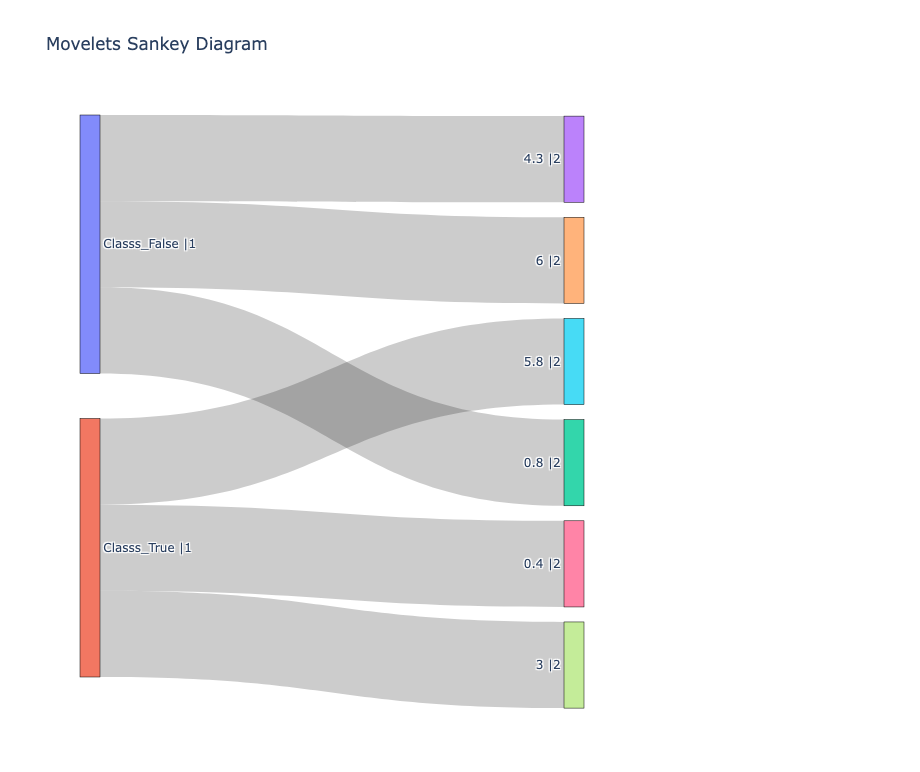

In [21]:
movelets_sankey(movs, attribute='lat') # or movelets_sankey(movs) -> to display all dimensions (may be confusing)

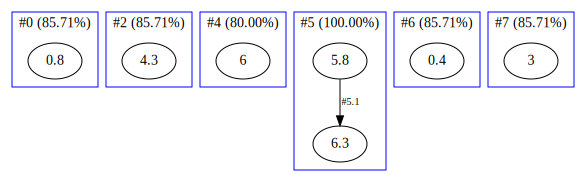

In [22]:
movelets_markov(movs, attribute='lat')

In [24]:
tree = createTree(movs.copy())

from anytree import RenderTree
root_node = convert2anytree(tree)
root_node = RenderTree(root_node)
print(root_node)

Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00")
├── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'lat': '0.8', 'lon': '6.2'} (85.71%) - 0.00")
├── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'precip': 10.0, 'price': -1.0} (85.71%) - 0.00")
│   └── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'precip': 10.0, 'price': -1.0} (85.71%) - 0.00/{'precip': 10.0, 'price': 2.0, 'weather': 'Clear'} (85.71%) - 0.40")
├── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'price': 2.0, 'lat': '4.3', 'lon': '16.9'} (85.71%) - 0.00")
├── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'lat': '0.4', 'lon': '6.7'} (85.71%) - 0.00")
├── Node("/{'lat': '5.8', 'lon': '16.5'}=>{'lat': '6.3', 'lon': '13'} (100.00%) - 0.00/{'lat': '3', 'lon': '13.5'} (85.71%) - 0.00")
├── Node("/{'lat': '

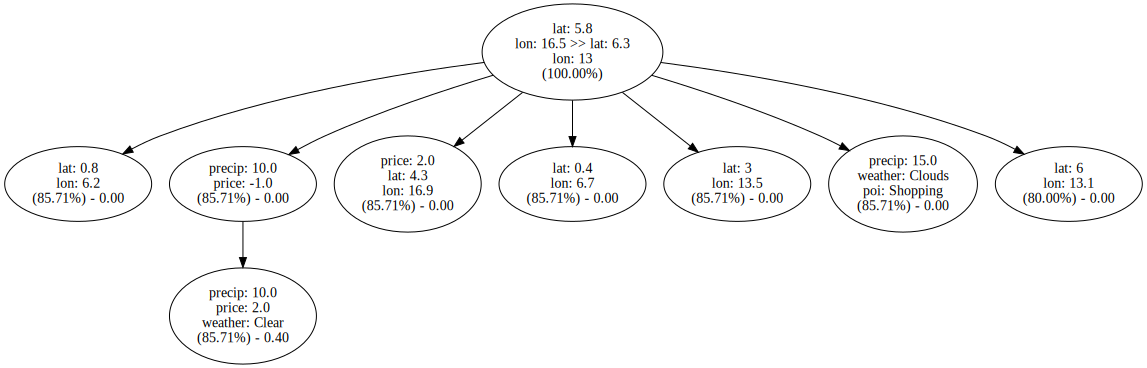

In [25]:
convert2digraph(tree)

# Find in AutoMATize files:
Find any text in automatize code, if you want to change something.

In [1]:
import os
import glob2 as glob
search_path = "automatize/"

search_str  = "TODO" # This is all the to do's I left in the code for later implementations

# Repeat for each file in the directory  
files = list(set(glob.glob(os.path.join(search_path, '**', '*.*'), recursive=True)))
files.sort()
for fname in files:
    # Open file for reading
    try:
        fo = open(fname)

        # Read the first line from the file
        line = fo.readline()

        # Initialize counter for line number
        line_no = 1
        has = False

        # Loop until EOF
        while line != '' :
                # Search for string in line
                index = line.find(search_str)
                if ( index != -1) :
                    has = True
                    print('\t', "[", line_no, ",", index, "] \t", line[:-1].strip(), sep="")

                # Read next line
                line = fo.readline()  

                # Increment line counter
                line_no += 1
        # Close the files
        fo.close()
        if has:
            print('^', fname, '\n')
    
    except:
        #print('Skip ->', fname)
        continue

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



	[14,43] 	sys.path.insert(0, os.path.abspath('.')) # TODO fix imports
^ automatize/methods/marc/.ipynb_checkpoints/marc_nn-checkpoint.py 

	[14,43] 	sys.path.insert(0, os.path.abspath('.')) # TODO fix imports
^ automatize/methods/marc/marc_nn.py 

	[50,31] 	#     adam = Adam(lr=par_lr) # TODO: check for old versions...
	[108,42] 	#         adam = Adam(lr=lst_par_lr[k]) # TODO: check for old versions...
	[310,31] 	#     adam = Adam(lr=par_lr) # TODO: check for old versions...
^ automatize/methods/movelet/.ipynb_checkpoints/moveletml-checkpoint.py 

	[50,31] 	#     adam = Adam(lr=par_lr) # TODO: check for old versions...
	[108,42] 	#         adam = Adam(lr=lst_par_lr[k]) # TODO: check for old versions...
	[310,31] 	#     adam = Adam(lr=par_lr) # TODO: check for old versions...
^ automatize/methods/movelet/moveletml.py 

	[55,6] 	# TODO - replace for pymove package version when implemented
^ automatize/methods/rf/.ipynb_checkpoints/randomforrest-checkpoint.py 

	[55,6] 	# TODO - replace f

\# By Tarlis Portela (2023)